In [ ]:
!pip install matplotlib
!pip install numpy
!pip install git+https://github.com/colour-science/colour

/usr/local/lib/python3.10/dist-packages/colour/utilities/verbose.py:262: ColourUsageWarning: The "CIE 2012 2 Degree Standard Observer" has been renamed to "CIE 2015 2 Degree Standard Observer" for consistency with the official CIE name which was adopted in 2015.
  warn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/colour/utilities/verbose.py:262: ColourUsageWarning: The "CIE 2012 10 Degree Standard Observer" has been renamed to "CIE 2015 10 Degree Standard Observer" for consistency with the official CIE name which was adopted in 2015.
  warn(*args, **kwargs)


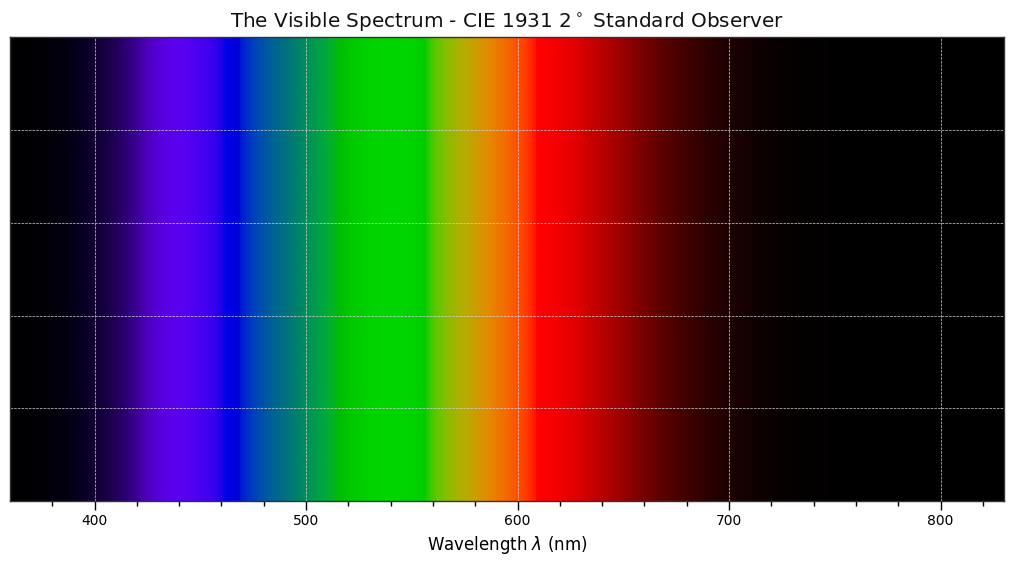

In [ ]:
from colour.plotting import *
import colour
colour_style()


# Images are not responsive in Google Colab, thus reducing the figure size.
import matplotlib.pyplot as plt

plt.style.use({'figure.figsize': (10.24, 5.76)})

plot_visible_spectrum();

# Scenario

###for an hypothetical scenario, we are planning to use an White reference color checker (white 9.5), for spectralon-like. First, in a nlab, in a controlled light, we measure the colorcheck with an spectroradiometer, for example, under illuminant D50 (5000K). ** (in this case will use only the visible from 400nm to 700nm)

In [ ]:
sdred = colour.SDS_COLOURCHECKERS['BabelColor Average']['white 9.5 (.05 D)']
sdred

SpectralDistribution([[  3.80000000e+02,   1.89000000e-01],
                      [  3.90000000e+02,   2.55000000e-01],
                      [  4.00000000e+02,   4.23000000e-01],
                      [  4.10000000e+02,   6.60000000e-01],
                      [  4.20000000e+02,   8.11000000e-01],
                      [  4.30000000e+02,   8.62000000e-01],
                      [  4.40000000e+02,   8.77000000e-01],
                      [  4.50000000e+02,   8.84000000e-01],
                      [  4.60000000e+02,   8.91000000e-01],
                      [  4.70000000e+02,   8.96000000e-01],
                      [  4.80000000e+02,   8.99000000e-01],
                      [  4.90000000e+02,   9.04000000e-01],
                      [  5.00000000e+02,   9.07000000e-01],
                      [  5.10000000e+02,   9.09000000e-01],
                      [  5.20000000e+02,   9.11000000e-01],
                      [  5.30000000e+02,   9.10000000e-01],
                      [  5.40000000e+02,

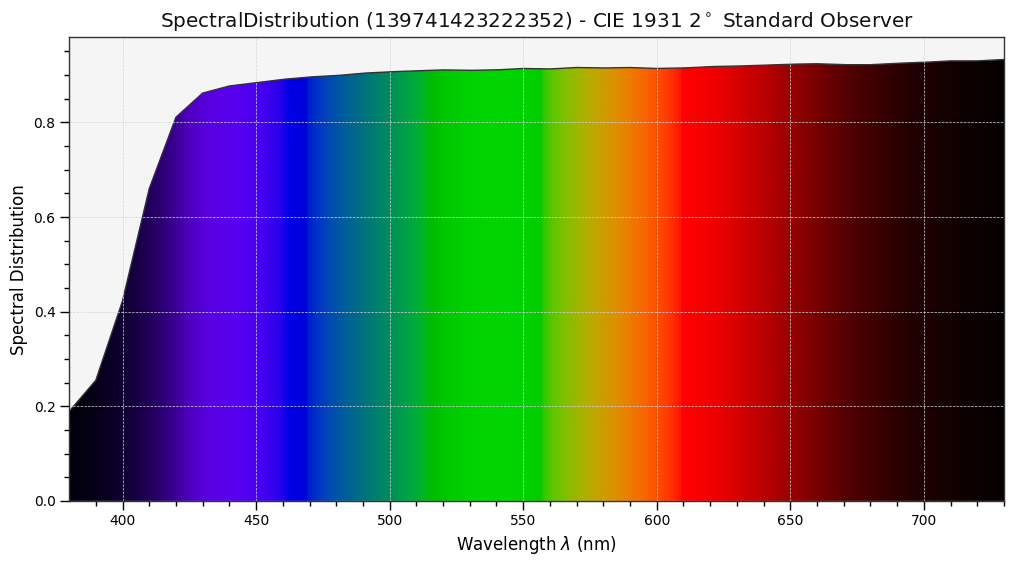

(<Figure size 1024x576 with 1 Axes>,
 <Axes: title={'center': 'SpectralDistribution (139741423222352) - CIE 1931 2$^\\circ$ Standard Observer'}, xlabel='Wavelength $\\lambda$ (nm)', ylabel='Spectral Distribution'>)

In [ ]:
sdred = colour.SDS_COLOURCHECKERS['BabelColor Average']['white 9.5 (.05 D)']
sd = colour.SpectralDistribution(sdred)
sd
plot_single_sd(sd)

## spectral distribution of D50 light

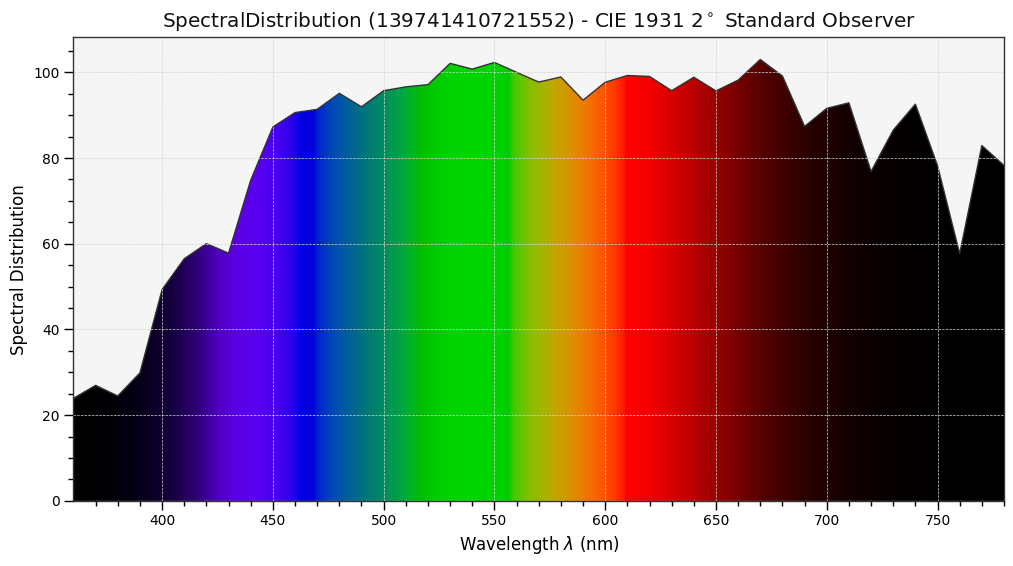

(<Figure size 1024x576 with 1 Axes>,
 <Axes: title={'center': 'SpectralDistribution (139741410721552) - CIE 1931 2$^\\circ$ Standard Observer'}, xlabel='Wavelength $\\lambda$ (nm)', ylabel='Spectral Distribution'>)

In [ ]:
illuminant = colour.SDS_ILLUMINANTS['D50']
illuminant = colour.SpectralDistribution(illuminant)
illuminant
plot_single_sd(illuminant)

In [ ]:
def calcular_fator_refletancia(intensidade_refletida, intensidade_incidente):
    # Verifica se as listas têm o mesmo tamanho
    if len(intensidade_refletida) != len(intensidade_incidente):
        raise ValueError("As listas de intensidades devem ter o mesmo tamanho.")

    fator_refletancia = []

    # Calcula o fator de refletância para cada comprimento de onda
    for i in range(len(intensidade_refletida)):
        intensidade_ref = intensidade_refletida[i]
        intensidade_inc = intensidade_incidente[i]
        fator = intensidade_ref / intensidade_inc
        fator_refletancia.append(fator)

    return fator_refletancia

# Exemplo de utilização
intensidade_refletida = sd[2:33]  # Sublista de intensidades refletidas com intervalo de 10 nm
intensidade_incidente = illuminant[20:82:2]  # Sublista de intensidades incidentes com intervalo de 20 nm

fator_refletancia = calcular_fator_refletancia(intensidade_refletida, intensidade_incidente)

# Exibir o resultado
comprimento_onda = 400  # Primeiro comprimento de onda
for fator in fator_refletancia:
    print("Comprimento de onda", comprimento_onda, ": Fator de Refletância =", fator*100)
    comprimento_onda += 10  # Incremento de 10 nm no comprimento de onda


Comprimento de onda 400 : Fator de Refletância = 0.727035225974
Comprimento de onda 410 : Fator de Refletância = 1.00495320116
Comprimento de onda 420 : Fator de Refletância = 1.17838684508
Comprimento de onda 430 : Fator de Refletância = 1.31562479968
Comprimento de onda 440 : Fator de Refletância = 1.05556839409
Comprimento de onda 450 : Fator de Refletância = 0.92578338135
Comprimento de onda 460 : Fator de Refletância = 0.907612947389
Comprimento de onda 470 : Fator de Refletância = 0.914957928274
Comprimento de onda 480 : Fator de Refletância = 0.890331730274
Comprimento de onda 490 : Fator de Refletância = 0.935279487169
Comprimento de onda 500 : Fator de Refletância = 0.911298595475
Comprimento de onda 510 : Fator de Refletância = 0.911291899126
Comprimento de onda 520 : Fator de Refletância = 0.917133790793
Comprimento de onda 530 : Fator de Refletância = 0.877291079396
Comprimento de onda 540 : Fator de Refletância = 0.894968430504
Comprimento de onda 550 : Fator de Refletânci

## now, during a flight N, we are planning, we measure the illuminant, which was 5380, using:
https://www.amazon.com/OPPLE-Illuminometer-Bluetooth-Flashlight-Lighting/dp/B0B4B1T3ZZ


In [ ]:
CCT_D65 = 5380 * 1.4388 / 1.4380
xy = colour.temperature.CCT_to_xy_CIE_D(CCT_D65)
sd_illuminant = colour.sd_CIE_illuminant_D_series(xy)

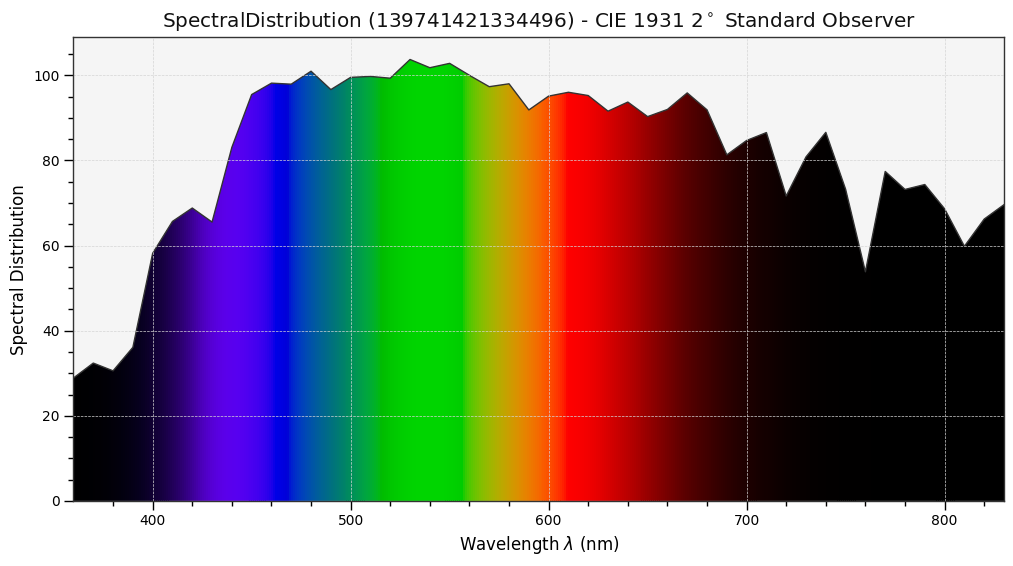

(<Figure size 1024x576 with 1 Axes>,
 <Axes: title={'center': 'SpectralDistribution (139741421334496) - CIE 1931 2$^\\circ$ Standard Observer'}, xlabel='Wavelength $\\lambda$ (nm)', ylabel='Spectral Distribution'>)

In [ ]:
new_illuminant = colour.SpectralDistribution(sd_illuminant)
new_illuminant
plot_single_sd(new_illuminant)

In [ ]:
def calcular_fator_refletancia(intensidade_refletida, intensidade_incidente):
    # Verifica se as listas têm o mesmo tamanho
    if len(intensidade_refletida) != len(intensidade_incidente):
        raise ValueError("As listas de intensidades devem ter o mesmo tamanho.")

    fator_refletancia = []

    # Calcula o fator de refletância para cada comprimento de onda
    for i in range(len(intensidade_refletida)):
        intensidade_ref = intensidade_refletida[i]
        intensidade_inc = intensidade_incidente[i]
        fator = intensidade_ref / intensidade_inc
        fator_refletancia.append(fator)

    return fator_refletancia

# Exemplo de utilização
intensidade_refletida = sd[2:33]  # Sublista de intensidades refletidas com intervalo de 10 nm
intensidade_incidente = new_illuminant[20:82:2] # Sublista de intensidades incidentes com intervalo de 20 nm

fator_refletancia = calcular_fator_refletancia(intensidade_refletida, intensidade_incidente)

# Exibir o resultado
comprimento_onda = 400  # Primeiro comprimento de onda
for fator in fator_refletancia:
    print("Comprimento de onda", comprimento_onda, ": Fator de Refletância =", fator*100)
    comprimento_onda += 10  # Incremento de 10 nm no comprimento de onda

Comprimento de onda 400 : Fator de Refletância = 0.727035225974
Comprimento de onda 410 : Fator de Refletância = 1.00495320116
Comprimento de onda 420 : Fator de Refletância = 1.17838684508
Comprimento de onda 430 : Fator de Refletância = 1.31562479968
Comprimento de onda 440 : Fator de Refletância = 1.05556839409
Comprimento de onda 450 : Fator de Refletância = 0.92578338135
Comprimento de onda 460 : Fator de Refletância = 0.907612947389
Comprimento de onda 470 : Fator de Refletância = 0.914957928274
Comprimento de onda 480 : Fator de Refletância = 0.890331730274
Comprimento de onda 490 : Fator de Refletância = 0.935279487169
Comprimento de onda 500 : Fator de Refletância = 0.911298595475
Comprimento de onda 510 : Fator de Refletância = 0.911291899126
Comprimento de onda 520 : Fator de Refletância = 0.917133790793
Comprimento de onda 530 : Fator de Refletância = 0.877291079396
Comprimento de onda 540 : Fator de Refletância = 0.894968430504
Comprimento de onda 550 : Fator de Refletânci